In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
#Lambda CDM
LCDM = Class()
LCDM.set({'Omega_cdm':0.25,'Omega_b':0.05})
LCDM.compute()

In [4]:
#Einstein-de Sitter
CDM = Class()
CDM.set({'Omega_cdm':0.95,'Omega_b':0.05, })
CDM.compute()

# Just to cross-check that Omega_Lambda is negligible 
# (but not exactly zero because we neglected radiation)
derived = CDM.get_current_derived_parameters(['Omega0_lambda'])
print (derived)
print ("Omega_Lambda =",derived['Omega0_lambda'])

{'Omega0_lambda': -9.167135654553071e-05}
Omega_Lambda = -9.167135654553071e-05


0.00022618981295386692

In [5]:
#Get background quantities and recover their names:
baLCDM = LCDM.get_background()
baCDM = CDM.get_background()
baCDM.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', 'gr.fac. D', 'gr.fac. f'])

In [6]:
#Get H_0 in order to plot the distances in this unit
fLCDM = LCDM.Hubble(0)
fCDM = CDM.Hubble(0)

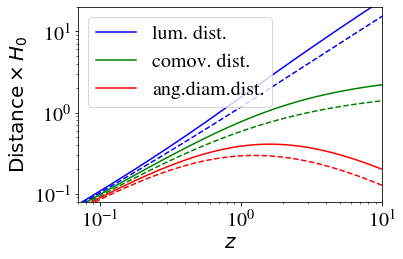

In [11]:
namelist = ['lum. dist.','comov. dist.','ang.diam.dist.']
colours = ['b','g','r']
for name in namelist:
    idx = namelist.index(name)
    plt.loglog(baLCDM['z'],fLCDM*baLCDM[name],colours[idx]+'-')
plt.legend(namelist,loc='upper left')
for name in namelist:
    idx = namelist.index(name)
    plt.loglog(baCDM['z'],fCDM*baCDM[name],colours[idx]+'--')
plt.xlim([0.07, 10])
plt.ylim([0.08, 20])

plt.xlabel(r"$z$")
plt.ylabel(r"$\mathrm{Distance}\times H_0$")
plt.tight_layout()

In [7]:
LCDM.

KeyError: '(.)rho_scf'

In [ ]:
plt.savefig('distances.pdf')